In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [70]:
df_camping_clean = pd.read_csv('camping_clean.csv', encoding='utf-8')

#Wieso?
df_correlation = df_camping_clean.drop(['Name', 'Ortschaft', 'Latitude', 'Longitude','Region', 'Golf', 'Disco','Region Nordwestschweiz', 'kleiner Platz (<80 m2)'], axis=1)


### Train-Test-Split
die Aufteilung von Training- und Testdaten sollte immer vor der Standardisierung oder jeglicher anderen Form der Datenvorverarbeitung durchgeführt werden:
Vermeidung von Datenlecks: Wenn du die Standardisierung vor der Aufteilung durchführst, wird die Information aus den Testdaten in die Standardisierungsparameter (Mittelwert und Standardabweichung) einbezogen, was zu Datenlecks führt. Das Modell erhält somit indirekt Informationen über die Testdaten, was zu unrealistisch guten Ergebnissen führt.

Replizierbarkeit: Wenn die Standardisierung nach der Aufteilung durchgeführt wird, ist der Prozess besser replizierbar und die Ergebnisse sind realistisch, da die Standardisierung nur auf Basis der Trainingsdaten erfolgt und auf die Testdaten angewendet wird.

In [71]:
X = df_correlation.drop(['Preis'],axis = 1)
y = df_correlation['Preis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Standardisierung: Normalisieren des Dataframes
Z-Scores berechnen: für jede Zelle in jedem Spalteneintrag des DataFrames wird der Mittelwert dieser Spalte abgezogen und das Ergebnis dann durch die Standardabweichung dieser Spalte geteilt. Nach der Normalisierung befinden sich alle Werte der Spalten auf einer vergleichbaren Skala: Mittelwert von 0 und eine Standardabweichung von 1.

Bei binären Werten, welche nur Werte 0 oder 1 haben, muss keine Normalisierung stattfinden. -> Werte lieben bereits im Bereich von 0 bis 1

In [72]:
from sklearn.preprocessing import StandardScaler

# Funktion zum Erkennen von numerischen, nicht-binären Spalten
def get_columns_to_normalize(df):
    columns_to_normalize = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]) and df[col].nunique() > 2:
            columns_to_normalize.append(col)
    return columns_to_normalize

# Spalten wählen, die normalisiert werden sollen
columns_to_normalize = get_columns_to_normalize(X)

# StandardScaler initialisieren
scaler = StandardScaler()

# Normalisierung nur auf die Trainingsdaten anpassen und anwenden
X_train[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])

# Normalisierung auf die Testdaten anwenden (mit den Parametern vom Trainingssatz)
X_test[columns_to_normalize] = scaler.transform(X_test[columns_to_normalize])


# Wenn du die anderen Spalten behalten möchtest, hänge sie wieder an
X_train_normalized = pd.concat([X_train.drop(columns_to_normalize, axis=1), X_train[columns_to_normalize]], axis=1)
X_test_normalized = pd.concat([X_test.drop(columns_to_normalize, axis=1), X_test[columns_to_normalize]], axis=1)


X_train_normalized

,weiter Unterküfte,mittlerer Platz (~100 m2),grosser Platz (>110 m2),Stellplatz am Wasser,Behindertengerechter Zugang,Haustierfreundlichkeit,Waschmaschine und Trockner,Aufenthaltsraum,Gemeinschaftsküche,Grillplatz,...,Nebensaison,Wandern,Strandzugang,Bahnhof,Busstation,Touristenstellplätze,Öffnungszeit[%],Sternebewertung,Mitgliedschaften,Aktivitäten
787,1,0,0,0,0,1,1,0,0,0,...,0,0,1,1,0,0.501151,-0.577964,0.636327,1.546723,0.191877
637,0,0,0,0,0,1,1,0,0,1,...,0,1,1,1,1,0.159733,-0.854083,-0.139799,-1.141778,-0.351283
444,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,-0.725425,-0.347865,-0.915926,-1.141778,-0.351283
332,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,1,-0.219620,-0.531944,-0.139799,0.202473,1.006617
291,1,0,0,0,1,1,1,1,1,0,...,1,1,1,1,1,-0.510458,1.446911,0.636327,-1.141778,1.006617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,0,0,1,0,0,1,0,0,0,...,0,1,0,1,1,0.501151,-0.485924,1.412454,0.202473,0.463457
106,1,0,0,0,0,1,0,0,0,0,...,1,1,0,1,1,0.501151,-1.636422,0.636327,-1.141778,0.191877
270,1,1,0,0,0,0,1,0,0,0,...,1,1,1,1,1,0.349409,0.250394,0.636327,1.546723,-0.894443
435,1,1,0,0,0,1,1,0,0,0,...,0,1,0,1,1,-0.029944,1.446911,-0.139799,0.202473,1.006617


In [73]:
model_lin = LinearRegression()
model_lin = model_lin.fit(X_train_normalized, y_train)

In [74]:
y_test_pred = model_lin.predict(X_test_normalized)
y_train_pred = model_lin.predict(X_train_normalized)


r2_test = model_lin.score(X_test_normalized, y_test)
print('R2 Testdaten:', r2_test)

mse_lr = mean_squared_error(y_test, y_test_pred)
print(f'MSE Testdaten: {mse_lr}')

# R^2 Wert für das Trainingsset berechnen
r2_train = model_lin.score(X_train_normalized, y_train)
print('R2 Trainingsdaten:', r2_train)
mse_lr_train = mean_squared_error(y_train, y_train_pred)
print(f'MSE Trainingsdaten: {mse_lr_train}')

# Modell schneidet auf Testdaten besser ab, als in Trainingsdaten ->

R2 Testdaten: 0.46880579873790496
MSE Testdaten: 77.23841756718772
R2 Trainingsdaten: 0.6020107884948456
MSE Trainingsdaten: 89.88225828619152


In [75]:
# Koeffizienten und Intercept ausgeben
print('Intercept:', model_lin.intercept_)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model_lin.coef_})
print(coefficients)

Intercept: 33.42553234650269
                           Feature  Coefficient
0             Touristenstellplätze     2.306281
1                weiter Unterküfte     8.214108
2       mittlerer Platz  (~100 m2)    12.677530
3          grosser Platz (>110 m2)    11.058419
4             Stellplatz am Wasser     0.738519
5      Behindertengerechter Zugang    -0.995047
6           Haustierfreundlichkeit    -0.227305
7       Waschmaschine und Trockner    -1.291155
8                  Aufenthaltsraum    -0.215444
9               Gemeinschaftsküche    -1.442965
10                      Grillplatz     2.160143
11                     Gastronomie     1.331968
12                            Shop    24.406246
13                       Hallenbad    -1.544900
14                         Freibad    -1.019833
15                 Bademöglichkeit    -2.066636
16                        Babypool    -2.403249
17                      Sportplatz    -3.464016
18                          Tennis    -0.379928
19         

Der Intercept gibt den geschätzten Wert für die Zielvariable (hier der Preis) an, wenn alle anderen Features (unabhängigen Variablen) Null sind. Der Intercept wäre der erwartete Grundpreis des Campingplatzes, wenn all diese Merkmale auf ihren Basiswert (meistens null) gesetzt sind.

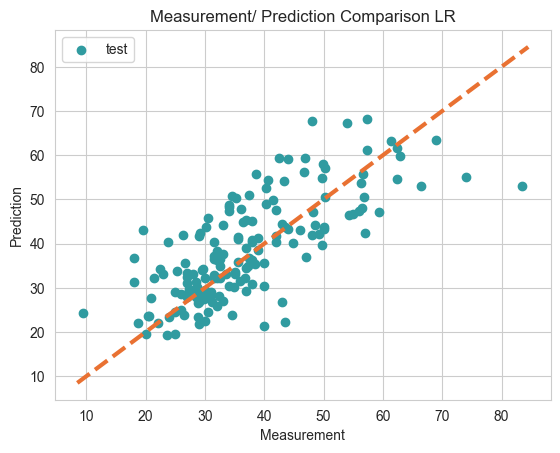

In [76]:
import matplotlib.pyplot as plt
import numpy as np
# Visualisieren der Testresultate
xmin= min(y_test.min(), y_test_pred.min() )-1
xmax= max(y_test.max(), y_test_pred.max() )+1

fig = plt.figure(1)
plt.scatter(y_test,y_test_pred, marker='o', color='#309BA0', label='test')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='#E97132', ls='--') ## Trennlinie (x2=x1)

plt.xlabel('Measurement')
plt.ylabel('Prediction')
plt.title('Measurement/ Prediction Comparison LR')
plt.legend()
#plt.savefig('LR.png')

#Anhand dieses Diagramms können wir sehen, wie gut unser Modell funktioniert. Die orange Linie entspricht der Gleichung y=x. Punkte, die auf der Linie liegen, sind also perfekt vorhergesagt. Punkte, die weit von der Linie entfernt sind, stammen von einer schlechten Vorhersage.